In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
df.drop(['G3'], axis=1, inplace=True)


In [ ]:
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])


In [5]:
X = df.drop(['pass'], axis=1)
y = df['pass']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


/home/tanishq/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Accuracy: 0.94
KNN Accuracy: 0.90
Decision Tree Accuracy: 0.89
Random Forest Accuracy: 0.90
SVM Accuracy: 0.89
Naive Bayes Accuracy: 0.87
XGBoost Accuracy: 0.87


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22  5]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.90      0.90      0.90        52

    accuracy                           0.87        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.87      0.87      0.87        79



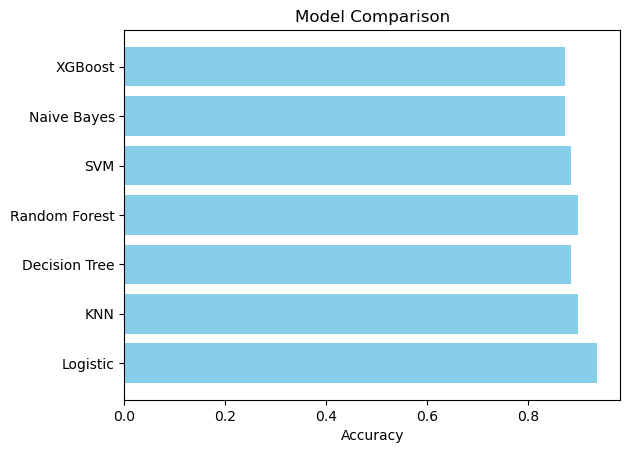

In [9]:


model_names = []
accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)

plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [10]:

st.title("Student Pass Prediction")
study_time = st.slider("Study Time", 1, 4)
failures = st.number_input("Past Failures", 0, 4)
absences = st.number_input("Absences", 0, 100)

# Build the feature vector and predict using your trained model


2025-06-08 00:19:44.495 
  command:

    streamlit run /home/tanishq/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-06-08 00:19:44.496 Session state does not function when running a script without `streamlit run`


In [11]:
selected_features = ['sex', 'studytime', 'famsup', 'internet', 'failures', 'absences', 'health']
X = df[selected_features]
y = df['pass']

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Save this model
import pickle
with open("student_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [14]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'pass'],
      dtype='object')

In [18]:
df.iloc[0:5, 10:]

,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,0,1,2,2,0,1,0,0,0,1,...,4,3,4,1,1,3,6,5,6,0
1,0,0,1,2,0,0,1,0,0,0,...,5,3,3,1,1,3,4,5,5,0
2,2,1,1,2,3,1,0,1,0,1,...,4,3,2,2,3,3,10,7,8,1
3,1,1,1,3,0,0,1,1,1,1,...,3,2,2,1,1,5,2,15,14,1
4,1,0,1,2,0,0,1,1,0,1,...,4,3,2,1,2,5,4,6,10,1
